<a href="https://colab.research.google.com/github/SJeevitha007/Assignment10/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [43]:
df=pd.read_csv("trainKNN.txt",sep=",",header=None, names=["RI","Na","Mg","Ai","Si","K","Ca","Ba","Fe","Types_of_glass"])
df=df.reset_index()
df

,index,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Types_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


<AxesSubplot:>

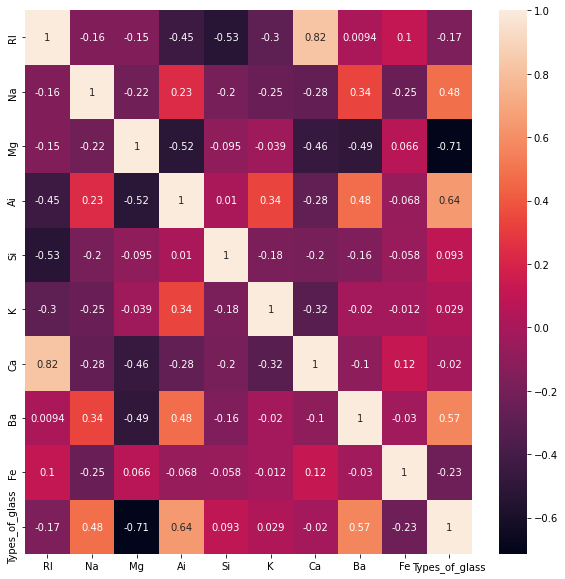

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Taking all the features with postive values

In [5]:
df.isnull().sum()

RI                0
Na                0
Mg                0
Ai                0
Si                0
K                 0
Ca                0
Ba                0
Fe                0
Types_of_glass    0
dtype: int64

In [7]:
df.describe()

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Types_of_glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [44]:
df1=pd.read_csv("testKNN.txt",sep=",",header=None, names=["RI","Na","Mg","Ai","Si","K","Ca","Ba","Fe","Types_of_glass"])
df1=df.reset_index()
df1

,level_0,index,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Types_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [24]:
df1.corr()

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Types_of_glass
RI,1.000000,-0.636628,0.308093,0.030600,-0.774173,0.020252,0.654723,-0.157747,0.320459,-0.351256
Na,-0.636628,1.000000,-0.527254,-0.303840,0.750037,-0.602945,-0.438089,0.218803,-0.429169,0.561988
Mg,0.308093,-0.527254,1.000000,-0.349080,-0.642120,0.553537,-0.193593,-0.487757,0.429709,-0.934496
Ai,0.030600,-0.303840,-0.349080,1.000000,-0.097186,0.190656,0.038908,0.555922,-0.038268,0.441113
Si,-0.774173,0.750037,-0.642120,-0.097186,1.000000,-0.451536,-0.421474,0.314762,-0.403519,0.594817
K,0.020252,-0.602945,0.553537,0.190656,-0.451536,1.000000,-0.076011,-0.406626,0.511263,-0.506034
Ca,0.654723,-0.438089,-0.193593,0.038908,-0.421474,-0.076011,1.000000,-0.320584,0.022986,-0.005559
Ba,-0.157747,0.218803,-0.487757,0.555922,0.314762,-0.406626,-0.320584,1.000000,-0.306187,0.631331
Fe,0.320459,-0.429169,0.429709,-0.038268,-0.403519,0.511263,0.022986,-0.306187,1.000000,-0.334000
Types_of_glass,-0.351256,0.561988,-0.934496,0.441113,0.594817,-0.506034,-0.005559,0.631331,-0.334000,1.000000


In [62]:
x_train=df.drop("Types_of_glass",axis=1)
y_train=df["Types_of_glass"].values
x_test=df1.drop("Types_of_glass",axis=1)
y_test=df1["Types_of_glass"].values

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
Eucl=cross_val_score(KNeighborsClassifier(metric="euclidean"),x_train,y_train,cv=5)
man=cross_val_score(KNeighborsClassifier(metric="manhattan"),x_train,y_train,cv=5)

In [71]:
print("Using Euclidean Distance the mean score is: {}".format(Eucl.mean()))
print("Using manhattan Distance the mean score is: {}".format(man.mean()))

Using Euclidean Distance the mean score is: 0.8724358974358974
Using manhattan Distance the mean score is: 0.9133333333333333


In [72]:
knn=KNeighborsClassifier(metric="euclidean")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9489795918367347

In [73]:
knn=KNeighborsClassifier(metric="manhattan")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9642857142857143

The accuarcy is little high in Manhattan Distance than Euclidean